<a href="https://colab.research.google.com/github/heguhegu/SOCMED_6/blob/Hendry/Sentiment_Analysis_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/amaiya/ktrain/blob/master/examples/text/ArabicHotelReviews-BERT.ipynb

https://www.youtube.com/watch?v=sZdIybqppqQ

In [ ]:
!pip install ktrain
  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 263 kB 59.5 MB/s 
     |████████████████████████████████| 1.2 MB 60.3 MB/s 
     |████████████████████████████████| 468 kB 61.5 MB/s 
     |████████████████████████████████| 981 kB 68.8 MB/s 
     |████████████████████████████████| 22.3 MB 5.3 MB/s 
     |████████████████████████████████| 2.8 MB 39.4 MB/s 
     |████████████████████████████████| 3.3 MB 56.6 MB/s 
     |████████████████████████████████| 880 kB 45.7 MB/s 
     |████████████████████████████████| 101 kB 12.1 MB/s 
     |████████████████████████████████| 596 kB 55.2 MB/s 
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=63d2dd3ca2488e54c84f851257b77356f8e6b1810fa286016a00c6e9189b8309
  Stored in directory: /root/.cache/pip/wheels/a4/e8/45/842b3a39831261aef9154b907eacbc4ac99499a99ae829b0

In [ ]:
import numpy as py
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
!git clone https://github.com/heguhegu/Social-Media-Tweet-Dataset-1.git

Cloning into 'Social-Media-Tweet-Dataset-1'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
dataset = pd.read_csv('/content/Social-Media-Tweet-Dataset-1/tweets.csv')

In [ ]:
dataset.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [ ]:
dataset

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(dataset, 
                                                                   'text', # name of column containing review text
                                                                   label_columns='target',
                                                                   maxlen=200, 
                                                                   #max_features=100000,
                                                                   preprocess_mode='bert',
                                                                   val_pct=0.2) #automatically sample 20% of the data for validation

['not_target', 'target']
       not_target  target
5995          1.0     0.0
5051          0.0     1.0
11128         1.0     0.0
6935          1.0     0.0
4782          1.0     0.0
['not_target', 'target']
      not_target  target
4460         0.0     1.0
4884         1.0     0.0
7036         1.0     0.0
8963         1.0     0.0
9398         0.0     1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
x_train[0].shape

(9096, 200)

In [ ]:
model = text.text_classifier('bert', 
                             train_data = (x_train, y_train) , 
                             preproc=preproc)
learner = ktrain.get_learner(model=model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=6)

Is Multi-Label? False
maxlen is 200
done.


Instantiate a Learner object and call the lr_find and lr_plot methods to help identify a good learning rate.

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1516/1516 [==============================] - 449s 284ms/step - loss: 2.7395 - accuracy: 0.7279


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


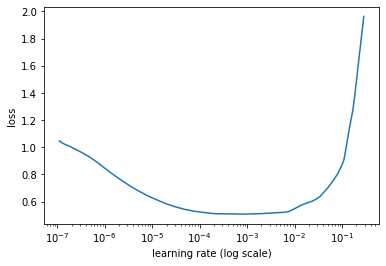

In [ ]:
learner.lr_plot()

In [ ]:
#learner.fit_onecycle(lr = 2e-5, epochs = 5)
learner.fit_onecycle(lr = 0.001, epochs = 5)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/5
1516/1516 [==============================] - 491s 315ms/step - loss: 0.4967 - accuracy: 0.8140 - val_loss: 0.4939 - val_accuracy: 0.8127
Epoch 2/5
1516/1516 [==============================] - 480s 317ms/step - loss: 0.5131 - accuracy: 0.8076 - val_loss: 0.4994 - val_accuracy: 0.8127
Epoch 3/5
1516/1516 [==============================] - 473s 312ms/step - loss: 0.5285 - accuracy: 0.8056 - val_loss: 0.5041 - val_accuracy: 0.8127
Epoch 4/5
1516/1516 [==============================] - 480s 316ms/step - loss: 0.5105 - accuracy: 0.8120 - val_loss: 0.5255 - val_accuracy: 0.8127
Epoch 5/5
1516/1516 [==============================] - 480s 316ms/step - loss: 0.4907 - accuracy: 0.8144 - val_loss: 0.4824 - val_accuracy: 0.8127
